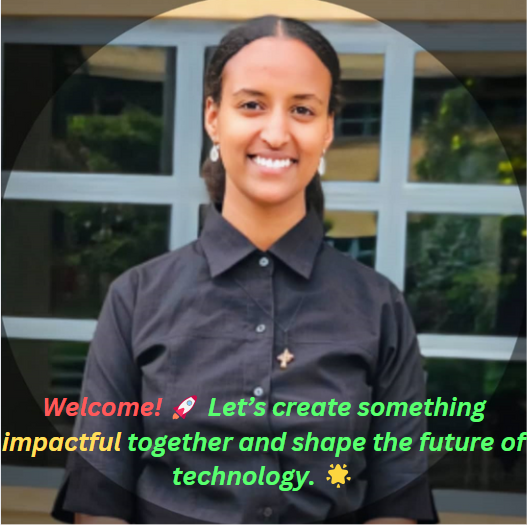

Here’s a step-by-step guide to implementing a ***Smart Traffic Light Contro***l **System Using Reinforcement Learning** on Google Colab.



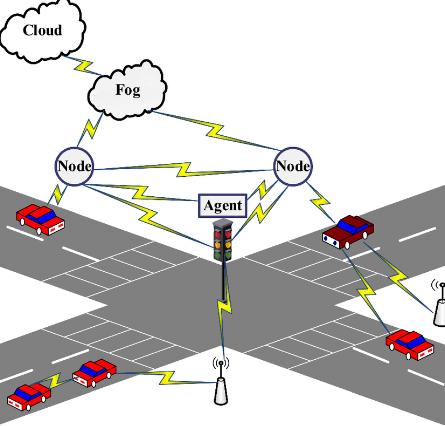

We’ll use Python with a custom simulation environment using **OpenAI Gym**, and we’ll train the RL agent using **Stable-Baselines3**

Step 1: Set Up Your Google Colab Environment
Open Google Colab: Go to Google Colab and open a new notebook.

Install Necessary Libraries: Run the following cells to install the required libraries.

In [ ]:
# Install Stable-Baselines3, Gym, and Matplotlib for the RL environment
!pip install stable-baselines3[extra] gym matplotlib numpy


Step 2: Define the Traffic Environment
We’ll create a custom environment in Gym to simulate traffic density at an intersection controlled by a traffic light. This environment will be used to train the RL agent.

1.Code for Custom Traffic Environment:

In [ ]:
import gym
from gym import spaces
import numpy as np
import random

class TrafficEnv(gym.Env):
    def __init__(self):
        super(TrafficEnv, self).__init__()

        # Define action and observation space
        # Two actions: 0 (Red light), 1 (Green light)
        self.action_space = spaces.Discrete(2)

        # Observation space: traffic density from 0 to 10
        self.observation_space = spaces.Discrete(11)  # Traffic density levels (0-10)

        # Initial traffic density
        self.state = np.random.randint(0, 10)

    def step(self, action):
        # Apply action and update traffic density
        if action == 1:  # Green light
            self.state = max(0, self.state - random.randint(1, 3))
        else:  # Red light
            self.state = min(10, self.state + random.randint(1, 2))

        # Calculate reward (penalty for high traffic density)
        reward = -self.state
        done = self.state == 0  # Episode ends if traffic is cleared

        # Return state, reward, done, and info
        return self.state, reward, done, {}

    def reset(self):
        # Reset traffic density for a new episode
        self.state = np.random.randint(0, 10)
        return self.state


2.Instantiate and Test the Environment:

In [ ]:
env = TrafficEnv()

# Test environment
state = env.reset()
print(f'Initial traffic density: {state}')
action = env.action_space.sample()  # Random action
next_state, reward, done, _ = env.step(action)
print(f'Next state: {next_state}, Reward: {reward}, Done: {done}')


Initial traffic density: 6
Next state: 4, Reward: -4, Done: False


Step 3: Define and Train the Reinforcement Learning Agent
We’ll use Stable-Baselines3 to implement and train a Q-learning-based agent. The DQN (Deep Q Network) algorithm is a good choice here as it handles discrete actions well.


Import DQN from Stable-Baselines3 and Train:



In [ ]:
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env

# Wrap environment
env = make_vec_env(lambda: TrafficEnv(), n_envs=1)

# Create DQN agent
model = DQN("MlpPolicy", env, verbose=1)

# Train the model
model.learn(total_timesteps=10000)


Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8.75     |
|    ep_rew_mean      | -45.5    |
|    exploration_rate | 0.967    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5069     |
|    time_elapsed     | 0        |
|    total_timesteps  | 35       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.5      |
|    ep_rew_mean      | -48      |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3612     |
|    time_elapsed     | 0        |
|    total_timesteps  | 76       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | -60.1    |
|    exploration_rate | 0.877    |
| time/               |          |
|  

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.292    |
|    n_updates        | 1547     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.97     |
|    ep_rew_mean      | -6.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1808     |
|    fps              | 571      |
|    time_elapsed     | 11       |
|    total_timesteps  | 6302     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.31     |
|    n_updates        | 1550     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 3.02     |
|    ep_rew_mean      | -6.88    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1812     |
|   

Save and Load the Model:

In [ ]:
# Save the model
model.save("dqn_traffic_light")

# Load the model (if needed later)
model = DQN.load("dqn_traffic_light")


Step 4: Evaluate the Agent’s Performance

Run the Agent in the Environment:

In [ ]:
# Test the trained agent
obs = env.reset()
total_reward = 0
for _ in range(50):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, _ = env.step(action)
    total_reward += reward
    if done:
        obs = env.reset()

print(f'Total reward over 50 steps: {total_reward}')


Total reward over 50 steps: [-114.]


Step 5: Visualize the Traffic Density Over Time


Create Visualization Code:

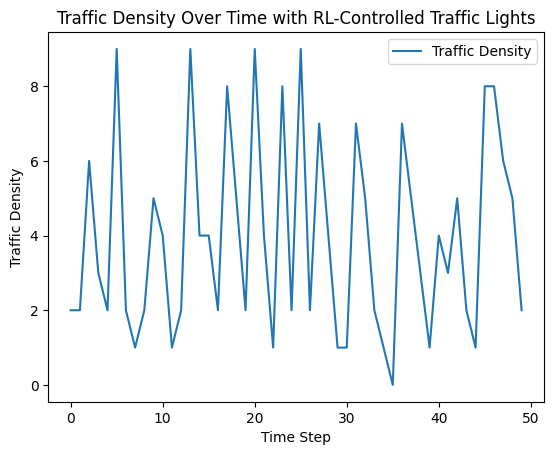

In [ ]:
import matplotlib.pyplot as plt

obs = env.reset()
traffic_densities = []
rewards = []

for _ in range(50):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, _ = env.step(action)
    traffic_densities.append(obs[0])
    rewards.append(reward)
    if done:
        obs = env.reset()

# Plot traffic density over time
plt.plot(traffic_densities, label='Traffic Density')
plt.xlabel('Time Step')
plt.ylabel('Traffic Density')
plt.title('Traffic Density Over Time with RL-Controlled Traffic Lights')
plt.legend()
plt.show()


Step 6: Interpret Results
Analyze the traffic density plot to see how the RL model performs in reducing congestion.
Observe if the RL agent effectively minimizes high traffic density by choosing green light actions at optimal times.

**Thank You !!!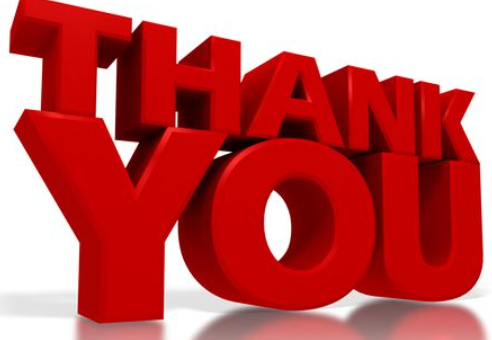**